# ADS 509 Assignment 5.1: Topic Modeling

This notebook holds Assignment 5.1 for Module 5 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In this assignment you will work with a categorical corpus that accompanies `nltk`. You will build the three types of topic models described in Chapter 8 of _Blueprints for Text Analytics using Python_: NMF, LSA, and LDA. You will compare these models to the true categories. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [ ]:
# Had to use different syntax for the import code chunk to run without error

In [1]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:url

In [2]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/ma

In [3]:
import spacy.cli
spacy.cli.download("en_core_web_sm")
import en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lvand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


In [2]:
# These libraries may be useful to you

# !pip install pyLDAvis==3.4.1 --user  # You need to restart the Kernel after installation.
# You also need a Python version => 3.9.0
from nltk.corpus import brown

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.lda_model

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import en_core_web_sm

from collections import Counter, defaultdict

nlp = en_core_web_sm.load()

c:\Users\lvand\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [35]:
# add any additional libaries you need here
import pyLDAvis
import pyLDAvis.gensim_models

In [4]:
# This function comes from the BTAP repo.

def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

## Getting to Know the Brown Corpus

Let's spend a bit of time getting to know what's in the Brown corpus, our NLTK example of an "overlapping" corpus.

In [5]:
# categories of articles in Brown corpus
for category in brown.categories() :
    print(f"For {category} we have {len(brown.fileids(categories=category))} articles.")

For adventure we have 29 articles.
For belles_lettres we have 75 articles.
For editorial we have 27 articles.
For fiction we have 29 articles.
For government we have 30 articles.
For hobbies we have 36 articles.
For humor we have 9 articles.
For learned we have 80 articles.
For lore we have 48 articles.
For mystery we have 24 articles.
For news we have 44 articles.
For religion we have 17 articles.
For reviews we have 17 articles.
For romance we have 29 articles.
For science_fiction we have 6 articles.


Let's create a dataframe of the articles in of hobbies, editorial, government, news, and romance.

In [6]:
categories = ['editorial','government','news','romance','hobbies'] 

category_list = []
file_ids = []
texts = []

for category in categories : 
    for file_id in brown.fileids(categories=category) :
        
        # build some lists for a dataframe
        category_list.append(category)
        file_ids.append(file_id)
        
        text = brown.words(fileids=file_id)
        texts.append(" ".join(text))

        
        
df = pd.DataFrame()
df['category'] = category_list
df['id'] = file_ids
df['text'] = texts 

df.shape

(166, 3)

In [7]:
# Let's add some helpful columns on the df
df['char_len'] = df['text'].apply(len)
df['word_len'] = df['text'].apply(lambda x: len(x.split()))


<Axes: xlabel='category'>

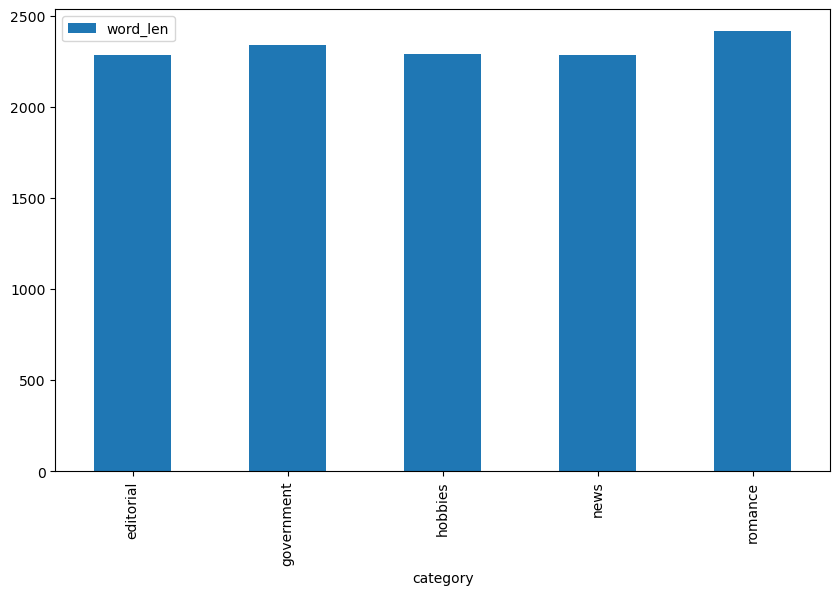

In [8]:
%matplotlib inline
df.groupby('category').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))

Now do our TF-IDF and Count vectorizations.

In [11]:
# Add custom contractions to stop words for consistency across preprocessing
custom_stopwords = list(stopwords) + ["aren", "didn", "isn", "won", "ll", "ve", "re"]

count_text_vectorizer = CountVectorizer(stop_words=custom_stopwords, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(df["text"])
count_text_vectors.shape

(166, 4935)

In [13]:
tfidf_text_vectorizer = TfidfVectorizer(stop_words=custom_stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

(166, 4935)

Q: What do the two data frames `count_text_vectors` and `tfidf_text_vectors` hold? 

A: The two data frames are different representations and breakdowns of the text from the 'text' dataframe. The 'count_text_vectors' data frame holds the term frequency counts of the words in the documents. Each row corresponds to a document, and each column corresponds to a unique term from the 'text' data. The 'tdif_text_vactors' holds the Term Frequency-Inverse Document Frequency values of the words in the documents. TF-IDF measures the importance of a word in a document relative to the corpus. It considers both the frequency of the term in the document and how common or rare the term is across all documents. Both of these data frames do not include the stopwords that have been explicitly stated.

## Fitting a Non-Negative Matrix Factorization Model

In this section the code to fit a five-topic NMF model has already been written. This code comes directly from the [BTAP repo](https://github.com/blueprints-for-text-analytics-python/blueprints-text), which will help you tremendously in the coming sections. 

In [14]:
nmf_text_model = NMF(n_components=5, random_state=314)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [15]:
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  mr (0.51)
  president (0.45)
  kennedy (0.43)
  united (0.42)
  khrushchev (0.40)

Topic 01
  said (0.89)
  thought (0.42)
  man (0.38)
  don (0.35)
  little (0.34)

Topic 02
  state (0.40)
  development (0.37)
  tax (0.33)
  sales (0.30)
  program (0.25)

Topic 03
  mrs (2.64)
  mr (0.79)
  said (0.63)
  miss (0.54)
  car (0.52)

Topic 04
  game (1.03)
  league (0.75)
  ball (0.74)
  baseball (0.71)
  team (0.67)


In [17]:
print("W_text_matrix shape:", W_text_matrix.shape)  # Should be (num_documents, num_topics)

W_text_matrix shape: (166, 5)


Now some work for you to do. Compare the NMF categorization to the original categories from the Brown Corpus.

We are interested in the extent to which our NMF categorization agrees or disagrees with the original categories in the corpus. For each topic in your NMF model, tally the Brown categories and interpret the results. 


In [18]:
# Create a DataFrame to hold the tally results of original category vs. NMF model
num_documents = W_text_matrix.shape[0]  # Number of documents processed by NMF
original_categories = [brown.categories(fileid)[0] for fileid in brown.fileids()][:num_documents]  # Ensure lengths match

results = pd.DataFrame({
    'document_id': range(num_documents),
    'assigned_topic': W_text_matrix.argmax(axis=1),  # Get the topic with the highest weight
    'original_category': original_categories  # This should match the number of documents processed
})

# Tally occurrences
topic_category_counts = pd.crosstab(results['assigned_topic'], results['original_category'])

# Display the counts
print(topic_category_counts)

original_category  editorial  hobbies  lore  news  religion  reviews
assigned_topic                                                      
0                          6        0     0    22         4        0
1                          0       29     4     4         4        0
2                         14        5    21    17         4        4
3                          3        1     0     0         2       12
4                          4        1     0     1         3        1


In [19]:
# Cleaner Interpretation
for topic in range(topic_category_counts.shape[0]):
    print(f"\nTopic {topic}:")
    for category, count in topic_category_counts.loc[topic].items():
        print(f"  {category}: {count}")


Topic 0:
  editorial: 6
  hobbies: 0
  lore: 0
  news: 22
  religion: 4
  reviews: 0

Topic 1:
  editorial: 0
  hobbies: 29
  lore: 4
  news: 4
  religion: 4
  reviews: 0

Topic 2:
  editorial: 14
  hobbies: 5
  lore: 21
  news: 17
  religion: 4
  reviews: 4

Topic 3:
  editorial: 3
  hobbies: 1
  lore: 0
  news: 0
  religion: 2
  reviews: 12

Topic 4:
  editorial: 4
  hobbies: 1
  lore: 0
  news: 1
  religion: 3
  reviews: 1


Q: How does your five-topic NMF model compare to the original Brown categories? 

A: For most topics, the NMF model successful separates distinct topics. However, topic 2 seems to have a more diverse mix of topics potentially suggesting that the corpus is more creative or has more depths in those topics. All other topics appear to have focused content. For example, topic 1 seems to focus on hobbies, topic 00 focuses on news articles, topic 3 focuses on reviews, etc. Lastly, it appears that Topic 4 seems to have low counts of the original text topics, suggesting room for potential growth in preprocessing by adjusting the CountVectorizer or TFDIFVectorizer or further inspecting the custom stop words that were included.

## Fitting an LSA Model

In this section, follow the example from the repository and fit an LSA model (called a "TruncatedSVD" in `sklearn`). Again fit a five-topic model and compare it to the actual categories in the Brown corpus. Use the TF-IDF vectors for your fit, as above. 

To be explicit, we are once again interested in the extent to which this LSA factorization agrees or disagrees with the original categories in the corpus. For each topic in your model, tally the Brown categories and interpret the results. 


In [23]:
# Fit the TruncatedSVD LSA Model
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics, random_state=314)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_text_vectors)

# Create a DataFrame to hold the tally results of original category vs. NMF model
num_documents = lsa_topic_matrix.shape[0]  # Number of documents processed by LSA
original_categories = [brown.categories(fileid)[0] for fileid in brown.fileids()][:num_documents]  # Ensure lengths match

results_lsa = pd.DataFrame({
    'document_id': range(num_documents),
    'assigned_topic': lsa_topic_matrix.argmax(axis=1),  # Get the topic with the highest weight
    'original_category': original_categories  # This should match the number of documents processed
})

# Tally occurrences
topic_category_counts_lsa = pd.crosstab(results_lsa['assigned_topic'], results_lsa['original_category'])

# Display and Interpret the Results
print(topic_category_counts_lsa)

original_category  editorial  hobbies  lore  news  religion  reviews
assigned_topic                                                      
0                         23       28    25    44        15       13
1                          0        8     0     0         0        0
3                          0        0     0     0         0        3
4                          4        0     0     0         2        1


In [25]:
# Cleaner Interpretation of LSA
for topic in topic_category_counts_lsa.index:  # Use the index directly to avoid key error
    print(f"\nTopic {topic}:")
    for category, count in topic_category_counts_lsa.loc[topic].items():
        print(f"  {category}: {count}")


Topic 0:
  editorial: 23
  hobbies: 28
  lore: 25
  news: 44
  religion: 15
  reviews: 13

Topic 1:
  editorial: 0
  hobbies: 8
  lore: 0
  news: 0
  religion: 0
  reviews: 0

Topic 3:
  editorial: 0
  hobbies: 0
  lore: 0
  news: 0
  religion: 0
  reviews: 3

Topic 4:
  editorial: 4
  hobbies: 0
  lore: 0
  news: 0
  religion: 2
  reviews: 1


Q: How does your five-topic LSA model compare to the original Brown categories? 

A: The LSA model does not appear to capture the distinct topics as efficiently as the NMF model did previously. Topic 0 seems to hold most of the diversity while topics 1-4 have very low counts. The low counts suggest that the model is not effectively capturing the thematic elements of the corpus. In simpler terms, it seems that the LSA model is unbalanced. In order to improve the LSA model performance, dimensions could be reduced or stopwords again re-evaluated.

In [26]:
# call display_topics on your model
display_topics(lsa_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  said (0.44)
  mr (0.25)
  mrs (0.22)
  state (0.20)
  man (0.17)

Topic 01
  said (4.83)
  thought (2.67)
  mrs (2.48)
  got (2.37)
  don (2.32)

Topic 02
  mrs (3.12)
  mr (1.70)
  said (1.01)
  kennedy (0.80)
  khrushchev (0.75)

Topic 03
  mrs (28.68)
  club (6.37)
  game (6.05)
  jr (5.46)
  university (5.07)

Topic 04
  game (4.99)
  league (3.57)
  baseball (3.52)
  ball (3.44)
  team (3.22)


Q: What is your interpretation of the display topics output? 

A: Weights are fairly strong with each term within each topic. The topics appear to cluster around personal narratives, relationships, and social interactions and a focus on sports in Topic 04. It appears that a lot of the text is recounts of conversations rather than stories of text. Topics 3 and 4 have the strongest weights while aslo seeing the most diversity. This may suggest that the LSA model is more suited to pull the thematic elements regarding topic 3 and 4 from the corpus.

## Fitting an LDA Model

Finally, fit a five-topic LDA model using the count vectors (`count_text_vectors` from above). Display the results using `pyLDAvis.display` and describe what you learn from that visualization. 

In [38]:
# Initialize and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(count_text_vectors)

LatentDirichletAllocation(n_components=5, random_state=42)

In [40]:
# Prepare the visualization
pyLDAvis_data = pyLDAvis.lda_model.prepare(lda_model, count_text_vectors, count_text_vectorizer)

In [41]:
# call display_topics on your model
display_topics(lda_model, count_text_vectorizer.get_feature_names_out())


Topic 00
  said (1.39)
  mrs (0.88)
  old (0.50)
  home (0.47)
  man (0.47)

Topic 01
  use (0.56)
  development (0.52)
  equipment (0.40)
  water (0.37)
  000 (0.34)

Topic 02
  mr (0.59)
  state (0.57)
  general (0.54)
  states (0.53)
  tax (0.51)

Topic 03
  pool (0.56)
  small (0.45)
  state (0.42)
  work (0.37)
  great (0.36)

Topic 04
  state (0.84)
  said (0.68)
  president (0.63)
  united (0.58)
  states (0.55)


In [44]:
# Assuming you have the LDA topic assignments stored
lda_topic_matrix = lda_model.transform(count_text_vectors)  # Get topic assignments
lda_topic_assignments = lda_topic_matrix.argmax(axis=1)  # Get the topic with the highest weight

results_lda = pd.DataFrame({
    'document_id': range(num_documents),
    'assigned_topic': lda_topic_assignments,
    'original_category': original_categories  # Original categories
})

# Tally occurrences for LDA
topic_category_counts_lda = pd.crosstab(results_lda['assigned_topic'], results_lda['original_category'])
print("LDA Topic vs Original Category Counts:")
print(topic_category_counts_lda)

LDA Topic vs Original Category Counts:
original_category  editorial  hobbies  lore  news  religion  reviews
assigned_topic                                                      
0                          4       27     4     3         8        7
1                          6        4    10     4         1        0
2                          2        0     2    11         1        1
3                          0        4     7     4         0        0
4                         15        1     2    22         7        9


In [45]:
# Cleaner Interpretation of LSA
for topic in topic_category_counts_lda.index:  # Use the index directly to avoid key error
    print(f"\nTopic {topic}:")
    for category, count in topic_category_counts_lda.loc[topic].items():
        print(f"  {category}: {count}")


Topic 0:
  editorial: 4
  hobbies: 27
  lore: 4
  news: 3
  religion: 8
  reviews: 7

Topic 1:
  editorial: 6
  hobbies: 4
  lore: 10
  news: 4
  religion: 1
  reviews: 0

Topic 2:
  editorial: 2
  hobbies: 0
  lore: 2
  news: 11
  religion: 1
  reviews: 1

Topic 3:
  editorial: 0
  hobbies: 4
  lore: 7
  news: 4
  religion: 0
  reviews: 0

Topic 4:
  editorial: 15
  hobbies: 1
  lore: 2
  news: 22
  religion: 7
  reviews: 9


Q: What inference do you draw from the displayed topics for your LDA model? 

A: In comparison across topics, it is clear that the LDA model is recognizing a notable pattern in political themes. However, on a broader spectrum, none of the weights from the display_topics are significantly strong. It probes the question of if the LDA model is recognizing the necessary patterns and thematic elements of the Brown corpus. 

Q: Repeat the tallying of Brown categories within your topics. How does your five-topic LDA model compare to the original Brown categories? 

A: When looking at the counts of the tallying of Brown categories rather than that of weights, it is clear that the LDA model did successfully pull thematic elements and assign to a corresponding topic based on the model logic. However, once again, not every topic has one theme that appears as the strongest, Topic 1 and 3 appear tohave a more general assortment rather than a strong thematic element.

In [42]:
lda_display = pyLDAvis.lda_model.prepare(lda_model, count_text_vectors, count_text_vectorizer, sort_topics=False)

In [43]:
pyLDAvis.display(lda_display)

Q: What conclusions do you draw from the visualization above? Please address the principal component scatterplot and the salient terms graph.

A: According to the principal component scatterplot, the topics 1, 2, and 4 appear to quite distinct based on the LDA model. However, Topics 3 and 5 are actually overlapping, suggesting a similarity and the possibility that the LDA model did not properly separate the themes, or that the two topics had similar themes without much disparity. However, when comparing the two topics in the salient terms graph, there does not appear to be much crossover in the actual text itself. It is worth noting that topic 5 is covers a large amount of the frequency of each corresponding term in the overall term frequency. This would suggest that topic 5 is either a large topic being discussed or a common topic within multiple thematic elements that can cross over into other topics within the corpus. Overall, the salient terms graph appears to have terms that are politically driven and from a professional corpus, suggesting that the LDA model did pull the significant themes and terms correctly.
